## Part 1 Inspecting and selecting working light curve

* [exoplanet.eu](http://exoplanet.eu/catalog/K2-45_b/)

In [1]:
!python --version

Python 3.6.1 :: Continuum Analytics, Inc.


In [2]:
import os
os.environ['CONDA_DEFAULT_ENV']

'astroconda35'

## import and parse csv

In [3]:
import glob
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
%matplotlib inline
#import multiprocessing

pl.style.use('seaborn-white')
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
pl.rcParams['ytick.labelsize'] = 'large'
pl.rcParams['xtick.labelsize'] = 'large'

In [4]:
import getpass
from tqdm import tqdm

data_dir = 'lc_k2-45'

file_list=glob.glob(data_dir+'/*.dat')
file_list.sort()
len(file_list)

52

In [5]:
#lcf
lcf=file_list[:26]
lcm=file_list[26:]

## import lc

In [6]:
band = 'g'
target_name = 'k2-45'
date = '170429'
target_star_id = '3'
comparison_star_ids = '2' #2, 1, 3, 4, 5, 6
aper_rad_range = '5-12'

data={}
data2={} #outliers remoed
bands='g,r,z'.split(',')
for b in sorted(bands):
    fname='lcf_msct_'+b+'_'+target_name+'_'+date+'_t'+target_star_id+\
            '_c'+comparison_star_ids+'_r'+aper_rad_range+'.bjd.dat'
    df=pd.read_csv(os.path.join(data_dir,fname), delimiter=' ', parse_dates=True)
    df = df.set_index('BJD(TDB)-2450000')
    try:
        df=df.drop('Unnamed: 20',1)
    except:
        pass
    #df.head()
    data[b]=df

In [8]:
data={}
data2={} #outliers remoed
bands='g,r,z'.split(',')
for i,b in zip([0,9,18],sorted(bands)):
    fname=lcf[i]
    df=pd.read_csv(fname, delimiter=' ', parse_dates=True)
    df = df.set_index('BJD(TDB)-2450000')
    try:
        df=df.drop('Unnamed: 20',1)
    except:
        pass
    #df.head()
    data[b]=df

In [9]:
data['g'].columns

Index(['#', 'airmass', 'sky', 'dx', 'dy', 'fwhm', 'peak', 'baserun',
       'flux(r=5.0)', 'err(r=5.0)', 'flux(r=6.0)', 'err(r=6.0)', 'flux(r=7.0)',
       'err(r=7.0)', 'flux(r=8.0)', 'err(r=8.0)', 'flux(r=9.0)', 'err(r=9.0)',
       'flux(r=10.0)', 'err(r=10.0)', 'flux(r=11.0)', 'err(r=11.0)',
       'flux(r=12.0)', 'err(r=12.0)', 'Unnamed: 25'],
      dtype='object')

In [10]:
cols1 = 'airmass,sky,dx,dy,fwhm,peak,baserun'.split(',')
cols2a =['flux(r={0}.0)'.format(i) for i in np.arange(5,13)]
cols2b =['err(r={0}.0)'.format(i) for i in np.arange(5,13)]

#alternate
cols2 = [None]*(len(cols2a)+len(cols2b))
cols2[::2] = cols2a
cols2[1::2] = cols2b

## g-band

In [11]:
df_g=data['g']
cols = np.concatenate((cols1,cols2,['','']),axis=0)
df_g.columns=cols
df_g = df_g.drop(['','','baserun'],axis=1)
df_g.head()

,airmass,sky,dx,dy,fwhm,peak,flux(r=5.0),err(r=5.0),flux(r=6.0),err(r=6.0),...,flux(r=8.0),err(r=8.0),flux(r=9.0),err(r=9.0),flux(r=10.0),err(r=10.0),flux(r=11.0),err(r=11.0),flux(r=12.0),err(r=12.0)
BJD(TDB)-2450000,,,,,,,,,,,,,,,,,,,,,
1.3049,7872.951317,9803.1,-78.232,2.552,4.35,36033.5,1.003390,0.004515,1.001360,0.004930,...,1.000000,0.005992,1.002107,0.006570,1.003080,0.007174,1.000683,0.007783,1.004426,0.008433
1.3002,7872.953088,7334.0,-75.836,2.102,4.66,32389.2,1.008728,0.004145,1.004829,0.004463,...,1.003197,0.005333,1.004230,0.005822,1.004155,0.006336,1.008323,0.006867,1.010543,0.007415
1.2957,7872.954882,5718.6,-73.270,1.137,4.17,35048.8,1.008671,0.003693,1.002701,0.003995,...,1.002510,0.004788,0.998810,0.005224,1.002279,0.005687,1.002318,0.006151,1.007097,0.006641
1.2915,7872.956653,4679.4,-71.060,0.123,4.29,32572.4,0.997389,0.003528,0.995589,0.003773,...,0.998681,0.004450,1.001145,0.004832,1.005328,0.005241,1.004921,0.005650,1.003825,0.006081
1.2874,7872.958423,3984.2,-71.488,0.434,5.67,25418.6,1.004335,0.003466,1.000840,0.003646,...,0.998015,0.004243,0.999683,0.004594,0.999640,0.004968,1.000822,0.005351,1.001995,0.005753


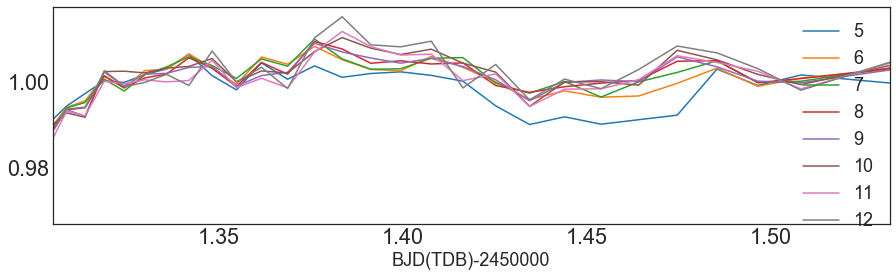

In [12]:
fig,ax=pl.subplots(1,1,figsize=(15,4))
for r in np.arange(5,13,1):
    c='flux(r={0:.1f})'.format(r)
    df_g[c].plot(label=r,ax=ax)
ax.legend()

After inspection:
g-band
* target_star_id = '3'
* comparison_star_ids = '2' or '7'
* aper_rad_range = '5-12'
* r=5 is best

In [13]:
from astropy.stats import sigma_clip

xc=sigma_clip(df_g['dx'], sigma_upper=3,sigma_lower=10)
yc=sigma_clip(df_g['dy'], sigma_upper=3,sigma_lower=10)
fc=sigma_clip(df_g['flux(r=11.0)'], sigma_upper=3,sigma_lower=10)
sum(xc.mask)+sum(yc.mask)+sum(fc.mask)

0

In [14]:
outliers_g=(xc.mask | yc.mask | fc.mask)
df_g=df_g[~outliers_g]

## Auxiliary parameters

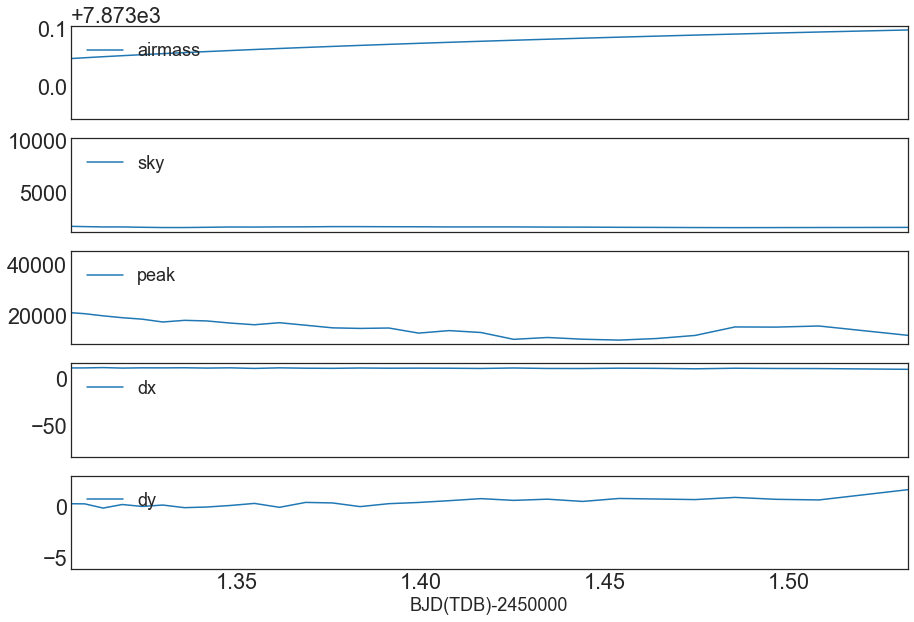

In [15]:
fig,ax=pl.subplots(5,1,figsize=(15,10), sharex=True)

aux_cols='airmass,sky,peak,dx,dy'.split(',')

for n,c in enumerate(aux_cols):
    df_g[c].plot(ax=ax[n],label=c)
    ax[n].legend(loc='upper left')
    #ax[n].set_xticks([])
    #ax[n].set_xlabel('')
#fig.tight_layout()

## r-band

In [16]:
df_r=data['r']
cols = np.concatenate((cols1,cols2,['','']),axis=0)
df_r.columns=cols
df_r = df_r.drop(['','','baserun'],axis=1)
df_r.head()

,airmass,sky,dx,dy,fwhm,peak,flux(r=5.0),err(r=5.0),flux(r=6.0),err(r=6.0),...,flux(r=8.0),err(r=8.0),flux(r=9.0),err(r=9.0),flux(r=10.0),err(r=10.0),flux(r=11.0),err(r=11.0),flux(r=12.0),err(r=12.0)
BJD(TDB)-2450000,,,,,,,,,,,,,,,,,,,,,
1.3206,7872.945785,5135.2,-85.395,8.319,4.40,24030.4,1.001268,0.003451,1.000000,0.003664,...,0.998434,0.004271,0.998228,0.004627,1.001283,0.005000,1.000356,0.005378,1.000647,0.005765
1.3184,7872.946538,4477.6,-84.578,7.340,4.35,24845.4,0.996817,0.003237,0.997626,0.003443,...,0.998785,0.004018,0.998779,0.004346,0.997647,0.004693,0.997574,0.005056,1.000226,0.005431
1.3162,7872.947279,3942.3,-83.608,7.647,3.90,29093.6,1.003261,0.003041,1.002732,0.003257,...,1.001129,0.003824,1.001023,0.004141,0.999927,0.004467,1.000677,0.004806,1.001401,0.005155
1.3140,7872.948031,3489.5,-82.498,6.963,4.19,24265.5,1.003324,0.003012,1.001556,0.003196,...,1.001276,0.003710,1.000071,0.004007,0.999983,0.004321,1.002362,0.004649,1.002283,0.004983
1.3119,7872.948772,3123.3,-81.685,6.693,3.95,26393.0,1.002929,0.002901,1.004459,0.003076,...,1.005875,0.003556,1.005110,0.003830,1.004028,0.004118,1.005556,0.004419,1.004303,0.004724


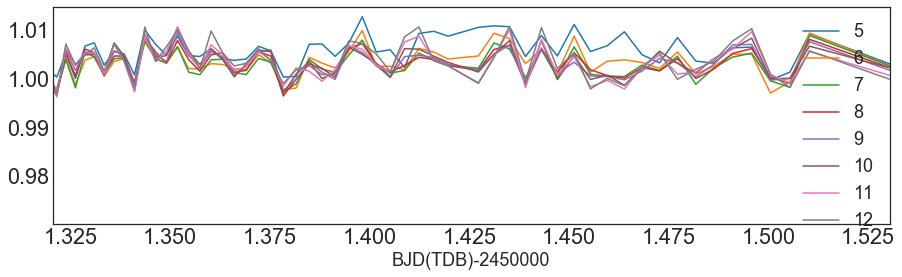

In [17]:
fig,ax=pl.subplots(1,1,figsize=(15,4))
for r in np.arange(5,13,1):
    c='flux(r={0:.1f})'.format(r)
    df_r[c].plot(label=r,ax=ax)
ax.legend()

In [18]:
from astropy.stats import sigma_clip

xc=sigma_clip(df_r['dx'], sigma_upper=3,sigma_lower=10)
yc=sigma_clip(df_r['dy'], sigma_upper=3,sigma_lower=10)
fc=sigma_clip(df_r['flux(r=11.0)'], sigma_upper=3,sigma_lower=10)
sum(xc.mask)+sum(yc.mask)+sum(fc.mask)

1

In [19]:
outliers_r=(xc.mask | yc.mask | fc.mask)
df_r=df_r[~outliers_r]

## Auxiliary parameters

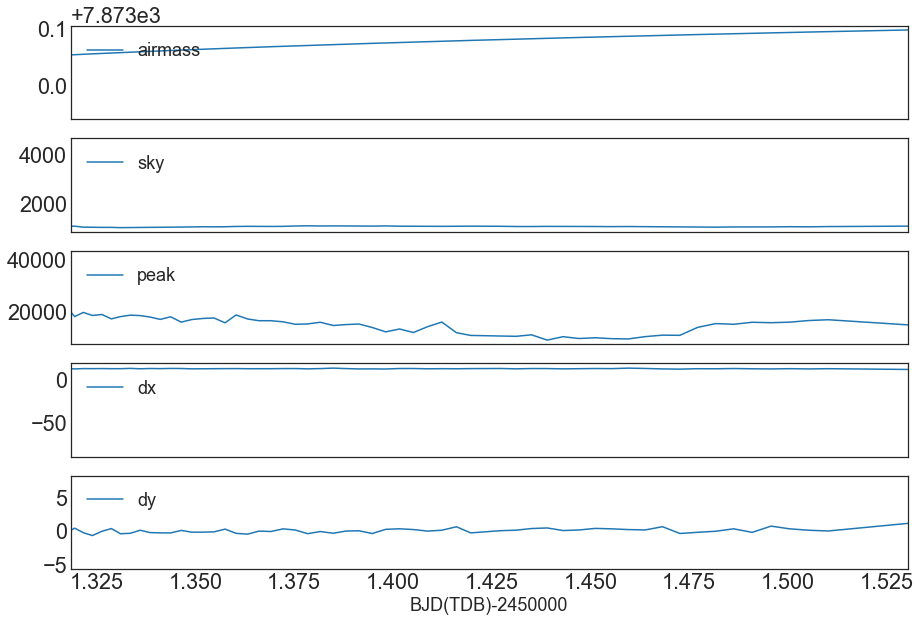

In [20]:
fig,ax=pl.subplots(5,1,figsize=(15,10), sharex=True)

aux_cols='airmass,sky,peak,dx,dy'.split(',')

for n,c in enumerate(aux_cols):
    df_r[c].plot(ax=ax[n],label=c)
    ax[n].legend(loc='upper left')
    #ax[n].set_xticks([])
    #ax[n].set_xlabel('')
#fig.tight_layout()

## z-band

In [21]:
df_z=data['z']
cols = np.concatenate((cols1,cols2,['','']),axis=0)
df_z.columns=cols
df_z = df_z.drop(['','','baserun'],axis=1)
df_z.head()

,airmass,sky,dx,dy,fwhm,peak,flux(r=5.0),err(r=5.0),flux(r=6.0),err(r=6.0),...,flux(r=8.0),err(r=8.0),flux(r=9.0),err(r=9.0),flux(r=10.0),err(r=10.0),flux(r=11.0),err(r=11.0),flux(r=12.0),err(r=12.0)
BJD(TDB)-2450000,,,,,,,,,,,,,,,,,,,,,
1.3206,7872.945785,5131.4,-85.395,8.319,4.25,16783.8,1.005317,0.006553,1.005528,0.007079,...,1.003422,0.008417,1.002949,0.009188,1.001289,0.009928,1.000918,0.010727,1.004362,0.011605
1.3184,7872.946538,4474.3,-84.578,7.340,4.34,16933.4,0.998264,0.006034,0.996766,0.006500,...,0.997947,0.007768,0.994116,0.008424,0.994324,0.009176,0.995170,0.009948,0.997056,0.010730
1.3162,7872.947279,3939.6,-83.608,7.647,3.79,19761.4,1.010690,0.005705,1.010667,0.006234,...,1.010885,0.007537,1.011979,0.008262,1.005138,0.008893,0.998010,0.009490,0.995799,0.010177
1.3140,7872.948031,3486.0,-82.498,6.963,4.14,17169.7,0.999659,0.005423,0.997329,0.005841,...,0.998553,0.006967,0.999077,0.007612,0.998940,0.008270,0.999201,0.008923,0.997885,0.009585
1.3119,7872.948772,3121.7,-81.685,6.693,4.13,17725.8,1.002284,0.005247,1.000899,0.005646,...,1.005507,0.006749,1.005360,0.007352,1.007616,0.008016,1.008620,0.008654,1.006708,0.009279


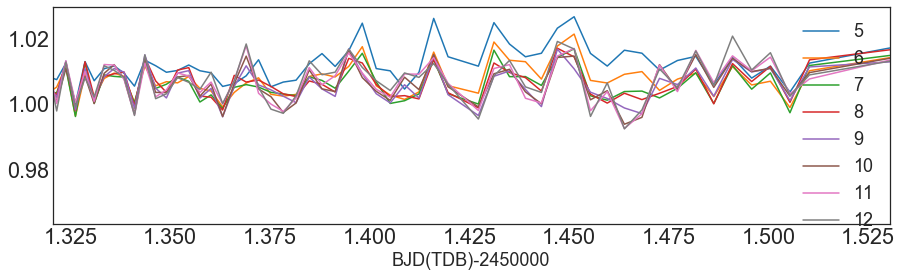

In [22]:
fig,ax=pl.subplots(1,1,figsize=(15,4))
for r in np.arange(5,13,1):
    c='flux(r={0:.1f})'.format(r)
    df_z[c].plot(label=r,ax=ax)
ax.legend()

In [35]:
from astropy.stats import sigma_clip

xc=sigma_clip(df_z['dx'], sigma_upper=3,sigma_lower=10)
yc=sigma_clip(df_z['dy'], sigma_upper=3,sigma_lower=10)
fc=sigma_clip(df_z['flux(r=11.0)'], sigma_upper=3,sigma_lower=10)
sum(xc.mask)+sum(yc.mask)+sum(fc.mask)

0

In [36]:
outliers_z=(xc.mask | yc.mask | fc.mask)
df_z=df_z[~outliers_z]

## Auxiliary parameters

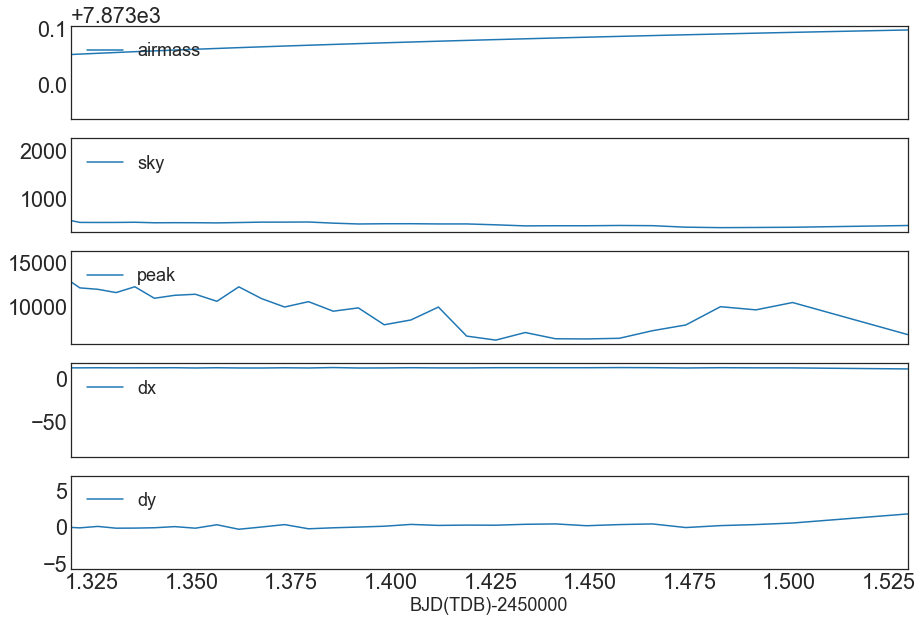

In [37]:
fig,ax=pl.subplots(5,1,figsize=(15,10), sharex=True)

aux_cols='airmass,sky,peak,dx,dy'.split(',')

for n,c in enumerate(aux_cols):
    df_z[c].plot(ax=ax[n],label=c)
    ax[n].legend(loc='upper left')
    #ax[n].set_xticks([])
    #ax[n].set_xlabel('')
#fig.tight_layout()

## combined g-,r-,z-band (working light curve)

In [38]:
len(df_g['flux(r=11.0)']), len(df_r['flux(r=11.0)']), len(df_z['flux(r=11.0)'])

(75, 195, 100)

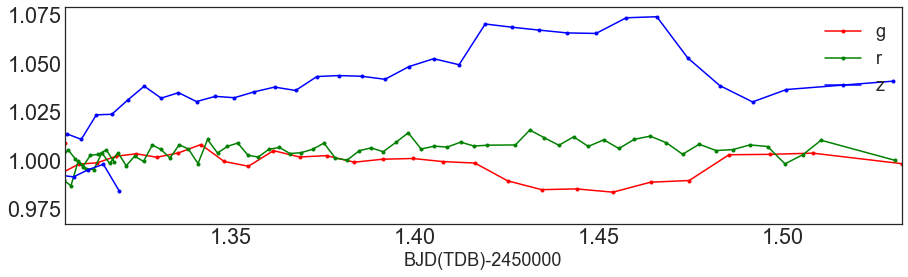

In [40]:
fig,ax = pl.subplots(1,1,figsize=(15,4))

r=5
df_g['flux(r={}.0)'.format(r)].plot(ax=ax, marker='.', label='g', color='r')
df_r['flux(r={}.0)'.format(r)].plot(ax=ax, marker='.', label='r', color='g')
df_z['flux(r={}.0)'.format(r)].plot(ax=ax, marker='.', label='z', color='b')
pl.legend()

## Save

In [43]:
df_g.to_csv('g-band.csv')
df_r.to_csv('r-band.csv')
df_z.to_csv('z-band.csv')